In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

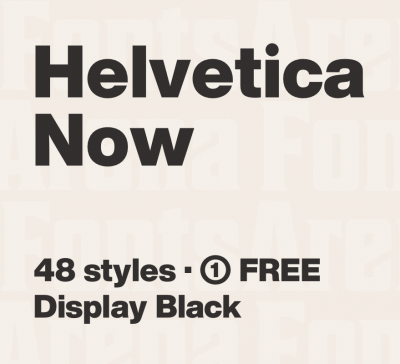

In [14]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

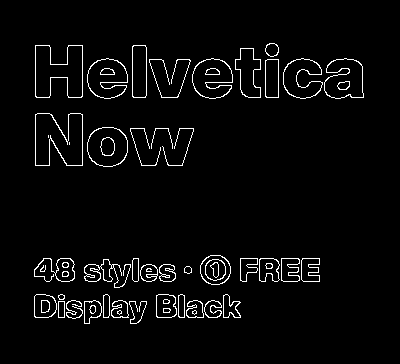

In [16]:
cv2_imshow(edges)





#**VERTICAL EDGE DETECTOR**

    Vertical Edge detector detects the vetical edges in images. The vertical edges is detected using the horizonatal gradient . Hence the kernel should like-
    [-1, 0, 1]
    [-1, 0, 1]
    [-1, 0, 1]

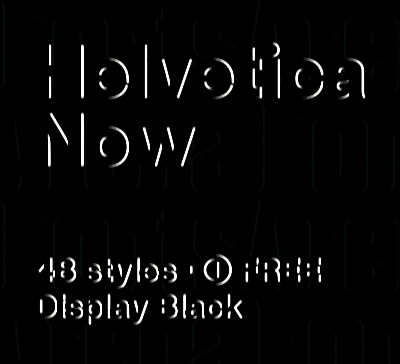

In [17]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#**HORIZONTAL EDGE DETECTOR**

Horizontal Edge detector detects the horizontal edges in images. The horizontal edges is detected using the vertical gradient . Hence the kernel should like- 
    
    [-1,-1,-1]
    [ 0, 0, 0]
    [ 1, 1, 1]

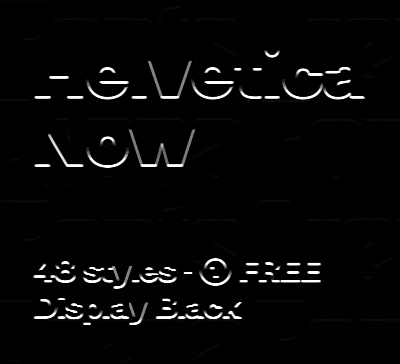

In [18]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#45 DEGREE TOWARDS RIGHT AND LEFT

The kernel for right and left inclined 45 degree edges will be have the 1st and 3rd rows intercghanged

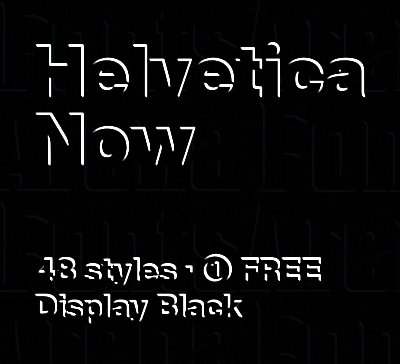

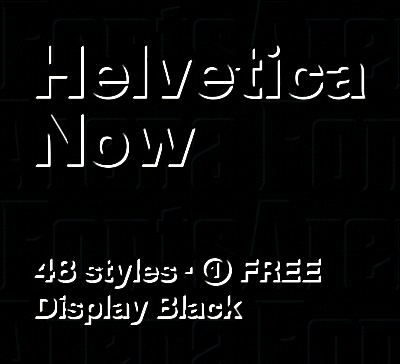

In [19]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

kernel = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

45 DEGREE TOWARDS LEFT

#**Blur**
    The purpose of Blur convolution is to reduce the intensity of each pixel. The centre pixel should have highest intensity but the factor should be less then 1(in order to decrease the original intensity) . The adjacent pixel's are also passed to not distort the image. Hence the kernel should like-
    [0.0625, 0.125,0.0625]
    [ 0.125,  0.25, 0.125]
    [0.0625,0.1250,0.0625]

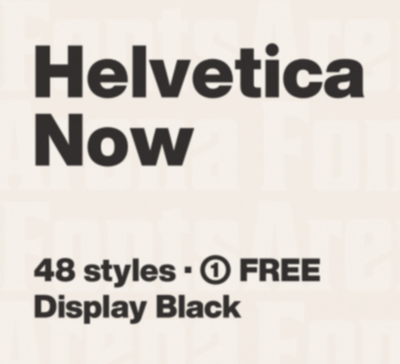

In [20]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#**Sharpen**
    Sharpen kernel is used to make image sharpe. For this, the center pixel should be highlighted(passed with factor more than 1) and the adjacent pixel should be supressed(passed with factor less then 0). Hence the kernel should like-
    [ 0,-1, 0]
    [-1, 5,-1]
    [ 0,-1, 0]

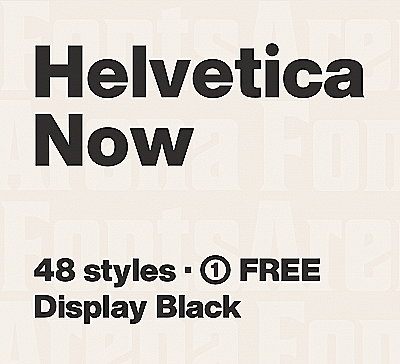

In [21]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#**Identity**
    Identity convolution means that the convolution does not extract any feature from image but directly forwards the original image . For this, the centre pixel should be forwarded with the same value and rest 8 pixel should be muted(their value should be passed as 0). Hence the kernel should like-
    [0,0,0]
    [0,1,0]
    [0,0,0]

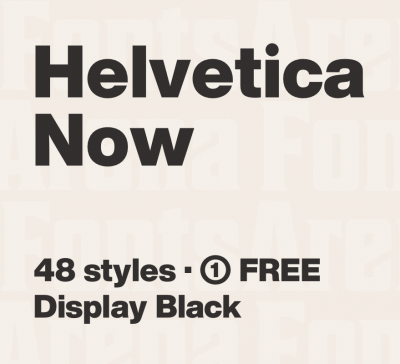

In [22]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)